In [1]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
from pandas import DataFrame

In [2]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)
#summary statistics
features.describe()
features.columns.values
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
#features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

The shape of our feature is (177, 7)


In [3]:
features = pd.get_dummies(features, columns = ['n [count]'])
#target pmax
pmax = features['Pmax [N]']
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
#features = np.array(features)



#print(features)
print_shape(pmax)
print_shape(features)

The shape of our feature is (177,)
The shape of our feature is (177, 11)


In [4]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [5]:
cov_matrix = empirical_covariance(train_features)

In [6]:
pca = PCA(0.95)
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [7]:


rf = RandomForestRegressor(n_estimators = 570, random_state = 141)
rf.fit(train_features, train_labels)
#Make Predictions
#Use the forest's predict method on the test data 
predictions = rf.predict(test_features)
print(predictions)
#Calculate the absolute errors
errors = abs(predictions - test_labels)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

[15.60110462 10.37651554  9.34600921 41.5049284  13.25613264 26.02473166
  9.63004592 56.40840202  8.50995282 16.76055314 21.21686496 25.8120277
 21.32200087  6.6033259  16.43102204 19.86370348 11.43861237 25.12270519
 13.42776187 29.00196897 53.54508225 14.20022059 31.73274231 41.72898168
 54.92900201 13.51588242 53.39468715 16.4384961  54.16829164 19.69480524
 27.27507385 11.48800343 15.52668648  9.86790568 40.42713305 17.71995412
 40.87272429  6.4857753   9.64031722 27.87831054 53.00472055 11.31806216
 42.39740463 11.85557398 28.87152478]
Mean Absolute Error: 2.68 newton.
Accuracy: 85.57 %.


In [9]:
new = DataFrame(predictions, test_labels)
new.to_csv("line_to_scatter_converter.csv")

In [10]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

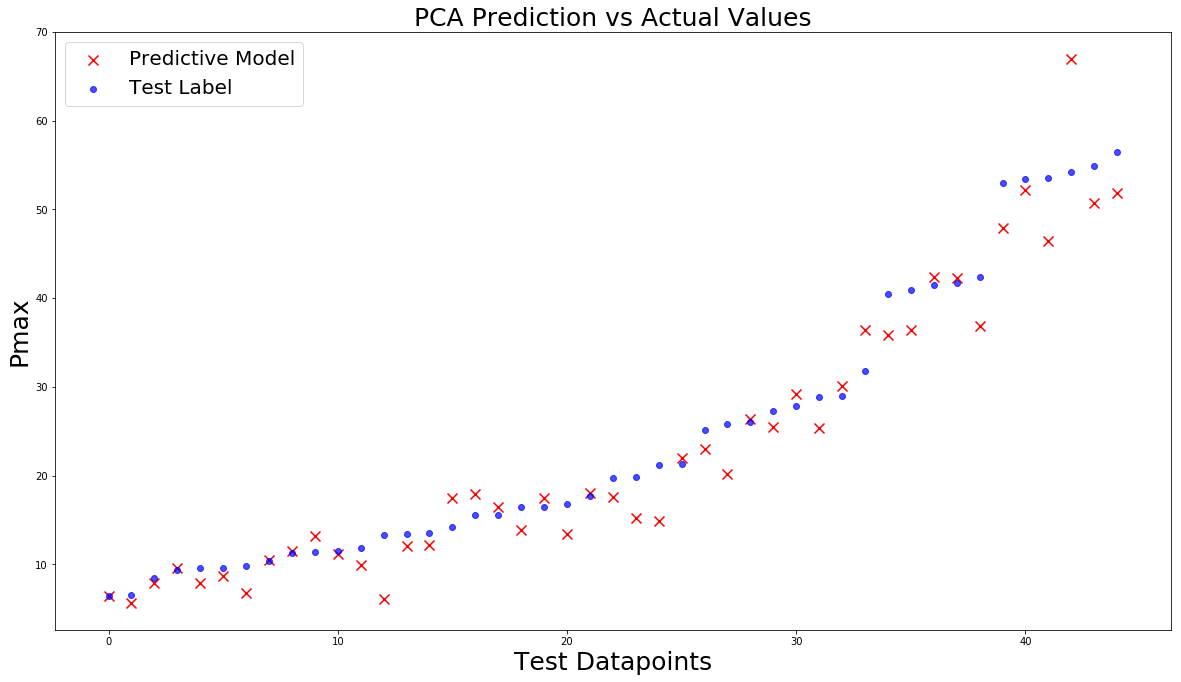

In [11]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("PCA Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("T_PCA_plot.png")